### Анализируем занятое пространство на Диске С

In [51]:
import file_size
from pprint import pprint

items = file_size.get_size_in_dir("C:/Program Files/")
# pprint(items)


file_size.pretty_print_info(items)


{'Application Verifier': 354721,
 'Bonjour': 613987,
 'CMake': 83140342,
 'CMake.lnk': 1106,
 'CPUID': 4479294,
 'Common Files': 320258279,
 'DAEMON Tools Pro': 38304346,
 'DIFX': 3442592,
 'Docker': 3586518205,
 'FSViewer65': 133366333,
 'Git': 672629648,
 'Hitman': 70416422355,
 'HxD': 8053777,
 'Hyper-V': 0,
 'InstruStar Electronic': 23823398,
 'IntelliJ IDEA 2019.2.4': 1509098852,
 'Java': 208408365,
 'KOMPAS-3D v18': 3370799247,
 'KiCad': 5730529227,
 'LinkShellExtension': 7853967,
 'Logitech': 243829504,
 'MATLAB R2017b': 13975985888,
 'MPC-HC': 40280492,
 'MSBuild': 25757,
 'MSI Kombustor x64': 21110842,
 'Microsoft Office': 2796075647,
 'Microsoft Office 15': 8645472,
 'Microsoft SQL Server': 624474702,
 'Microsoft Visual Studio 10.0': 4850,
 'Microsoft.NET': 694464,
 'Mozilla Firefox': 203984662,
 'MySQL': 1135102554,
 'NVIDIA Corporation': 1489736804,
 'NVIDIA GPU Computing Toolkit': 3022259930,
 'Notepad++': 12691659,
 'PDFCreator': 86254418,
 'PyCharm 2019.2': 997205133,
 '

In [54]:
print(len(items))

81


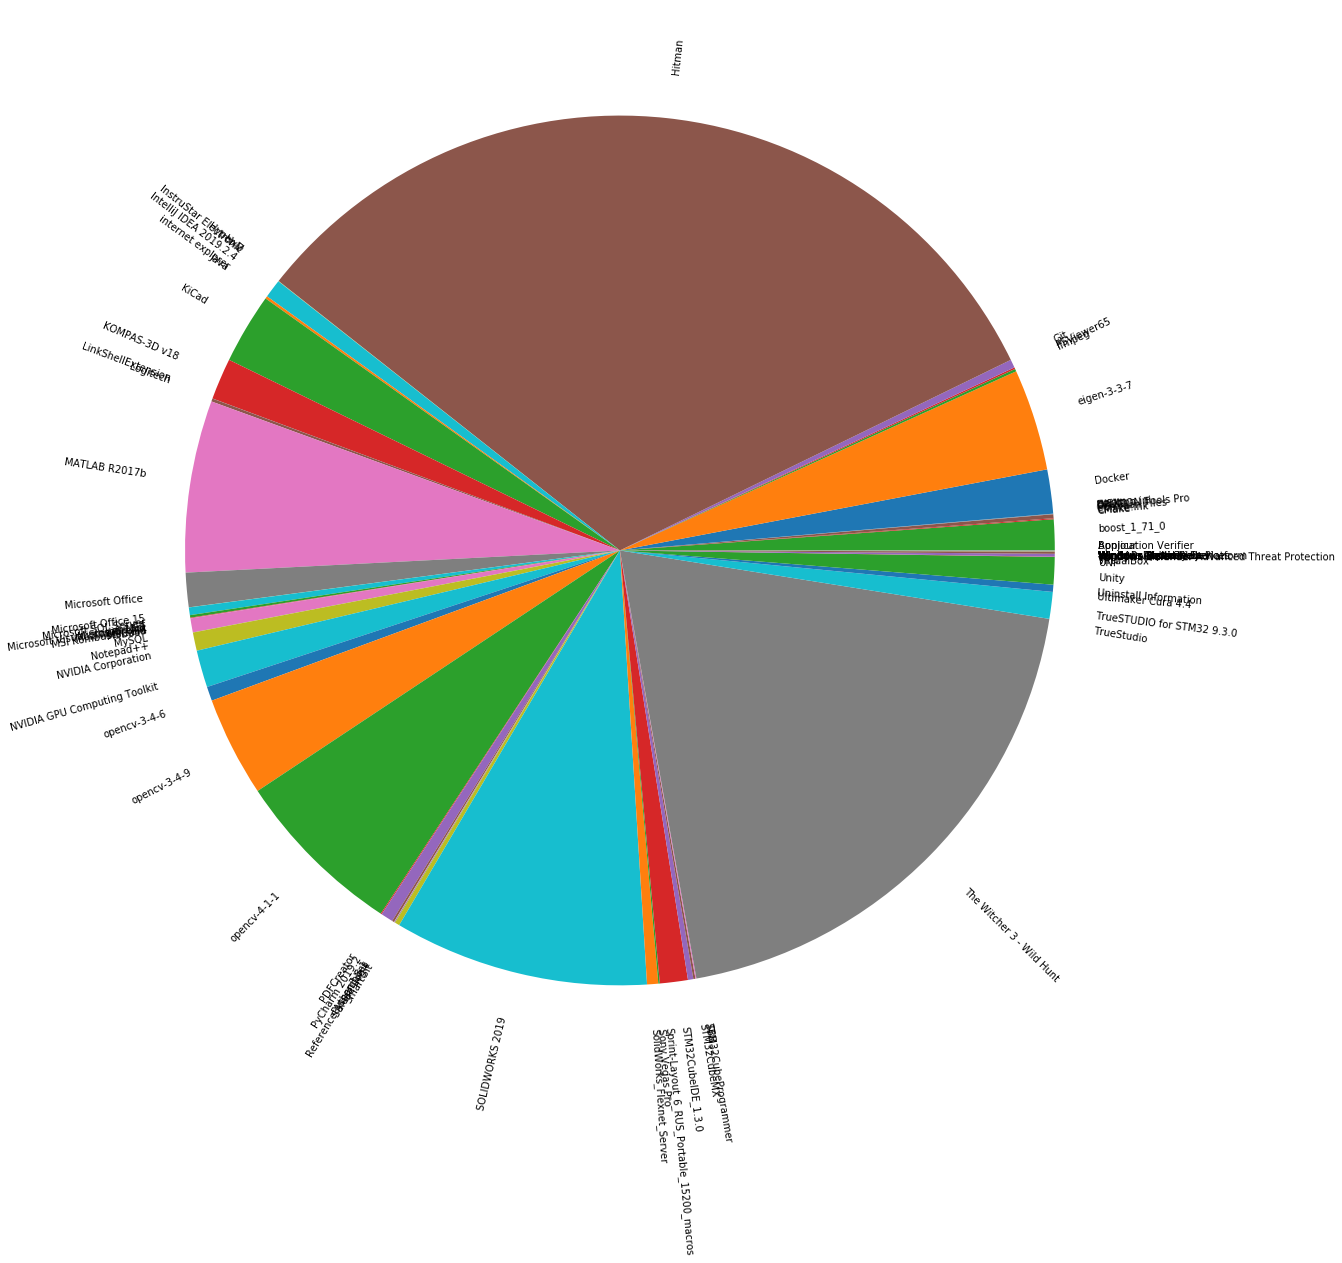

In [52]:
from matplotlib import pyplot as plt

sizes = [int(x) for x in items.values()]

plt.figure(figsize=(20,20))
plt.pie(sizes, labels = items.keys(), labeldistance = 1.1, rotatelabels = True)
plt.show()

In [68]:
# больше гигабайта только

most_significant = {k:v for k,v in items.items() if int(v) > 1024*1024*1024}
pprint(most_significant)


{'Docker': 3586518205,
 'Hitman': 70416422355,
 'IntelliJ IDEA 2019.2.4': 1509098852,
 'KOMPAS-3D v18': 3370799247,
 'KiCad': 5730529227,
 'MATLAB R2017b': 13975985888,
 'Microsoft Office': 2796075647,
 'MySQL': 1135102554,
 'NVIDIA Corporation': 1489736804,
 'NVIDIA GPU Computing Toolkit': 3022259930,
 'SOLIDWORKS 2019': 20735810290,
 'STM32CubeIDE_1.3.0': 2274315797,
 'The Witcher 3 - Wild Hunt': 43089505318,
 'TrueSTUDIO for STM32 9.3.0': 2178219242,
 'Unity': 2223561715,
 'boost_1_71_0': 2504431056,
 'eigen-3-3-7': 8263895867,
 'opencv-3-4-6': 1159733118,
 'opencv-3-4-9': 8138568933,
 'opencv-4-1-1': 14032945535}


In [69]:
print(len(most_significant))

20


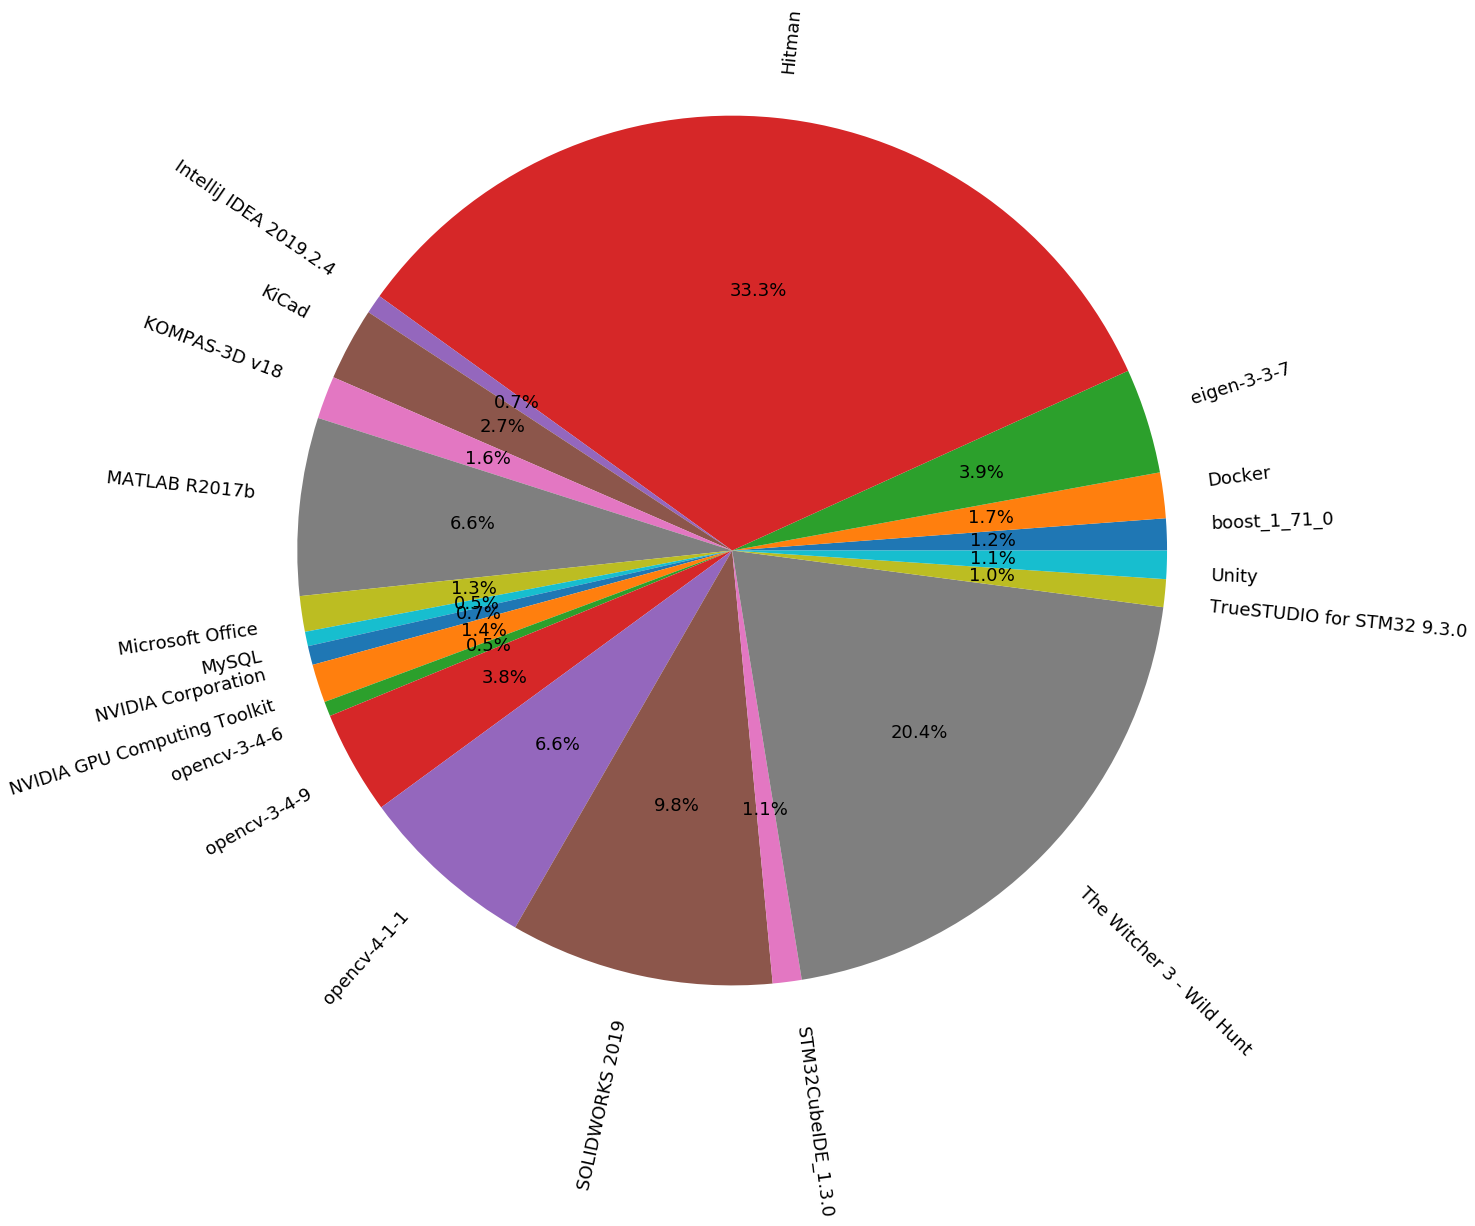

In [74]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0

sizes = [int(x) for x in most_significant.values()]

plt.figure(figsize=(20,20))
plt.pie(sizes, labels = most_significant.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()

In [73]:
items = file_size.get_size_in_dir("C:/Program Files (x86)/")
# pprint(items)


file_size.pretty_print_info(items)

desktop.ini               ini     0.169  Kib
Microsoft.NET             net     8.568  Mib
--------------------------------------------
Adobe                     dir     177.6  Mib
Advanced IP Scanner       dir     35.35  Mib
Application Verifier      dir     295.7  Kib
Arduino                   dir     453.5  Mib
Bonjour                   dir     616.3  Kib
Common Files              dir     487.6  Mib
DeviceManager             dir     10.11  Mib
DVDVideoSoft              dir     10.52  Mib
Epic Games                dir     819.3  Mib
Far Cry 3                 dir     11.05  Gib
FastStone Capture         dir     10.06  Mib
FlashLoader               dir     83.83  Mib
Foxit Software            dir     698.6  Mib
GPU-Z                     dir     6.249  Mib
InstallShield Installa    dir     225.4  Kib
Internet Explorer         dir     1.112  Mib
Logitech                  dir     37.08  Mib
Microsoft                 dir     220.2  Mib
Microsoft SDKs            dir     34.58  Mib
Microsoft 

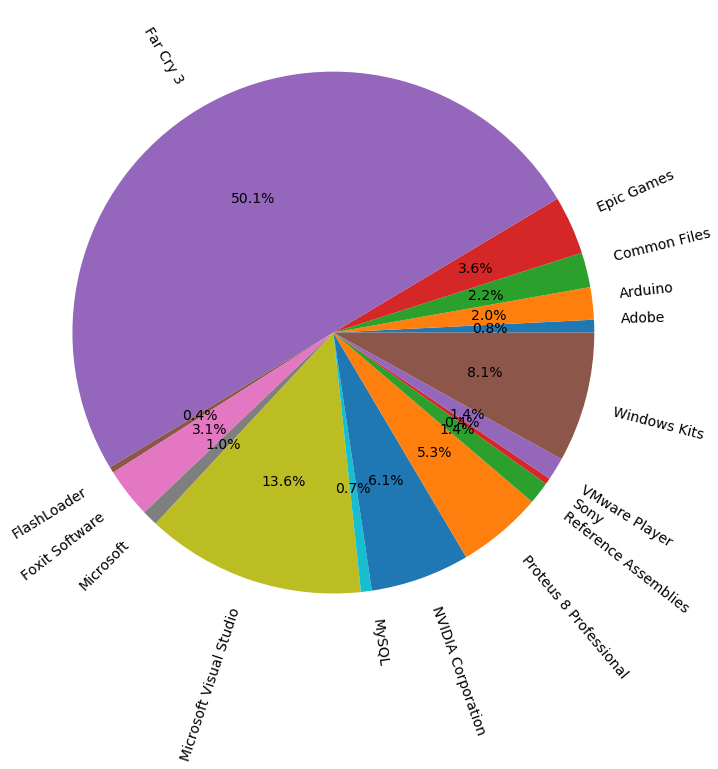

In [86]:
# Больше 64 Мб

most_significant = {k:v for k,v in items.items() if int(v) > 64*1024*1024}

sizes = [int(x) for x in most_significant.values()]

mpl.rcParams['font.size'] = 14.0
plt.figure(figsize=(12,12))
plt.pie(sizes, labels = most_significant.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
#plt.pie(items.values(), labels = items.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()